# Filtro Sobel: implementação e discussões

## Introdução

O filtro de Prewit também pode ser classificado como um filtro passa-alta, assim como Laplace. É um operador linear, cujo seu desenvolvimento está pautado em conceitos de diferenciação no domínio do tempo discreto.

O operador de sobel representa uma derivação de primeira ordem no espaço, representada pelo gradiente(taxa de variação) nas direções do sinal bidimensional. O definição desta derivada é dada por:

$$\frac{\partial f}{\partial x} = f(x+1) -  f(x)$$


E o vetor gradiente representado por:


$$ grad(f) = \left(\begin{array}{ccc} gx \\ gy  \end{array}\right) = \left(\begin{array}{ccc} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}  \end{array}\right) $$

Utilizando operadores de vizinhança diagonais o valor dos gradientes dado um ponto central no sinal é:

$$\frac{\partial f}{\partial x} = [f(x-1,y+1) + f(x,y+1) + f(x+1,y+1)] -  [f(x-1,y-1) + f(x,y-1) + f(x+1,y-1)] $$

$$\frac{\partial f}{\partial y} = [f(x+1,y-1) + f(x+1,y) + f(x+1,y+1)] -  [f(x-1,y-1) + f(x-1,y) + f(x-1,y+1)] $$

O efeito do vetor gradiente pode ser traduzido pela a aplicação de duas máscaras, nas direções $x$ e $y$ da imagem da seguinte forma:

Máscara horizontal:

$$\ \begin{array}{ccc}
......... x-1 & x & x+1.... \end{array} \ $$

$$\ \begin{array}{ccc}
y-1 ...\\
y   ...\\
y+1 ...\end{array} 
\left( \begin{array}{ccc}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \end{array} \right)\ $$

Máscara vertical:

$$\ \begin{array}{ccc}
......... x-1 & x & x+1.... \end{array} \ $$

$$\ \begin{array}{ccc}
y-1 ...\\
y   ...\\
y+1 ...\end{array} 
\left( \begin{array}{ccc}
-1 & -1& -1 \\
 0 & 0 & 0 \\
1  & 1 & 1 \end{array} \right)\ $$

É importante ressaltar que o somatório dos valores da máscara devem ser sempre zero, por ser um operador derivativo.

A magnitude imposta pelo vetor gradiente é transmitida ao pixel pela seguinte equação:

$$ M(x,y) = \sqrt{gx^2 + gy^2} $$ 

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da média
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterPrewit(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterPrewit(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[ 24.  26.  26. ...,  15.  16.  13.]
 [ 26.   2.   1. ...,   1.   2.  13.]
 [ 26.   1.   1. ...,   1.   2.  14.]
 ..., 
 [ 77.   1.   1. ...,   2.   4.  35.]
 [ 77.   2.   2. ...,   2.   3.  35.]
 [ 71.  76.  76. ...,  34.  35.  32.]]


### Exibir resultados:

- Imagem original:

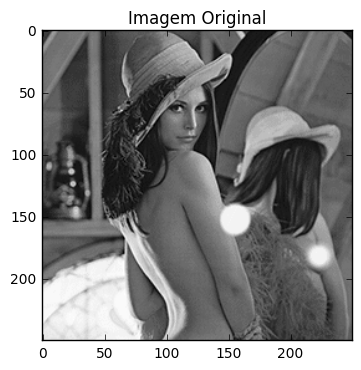

In [5]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

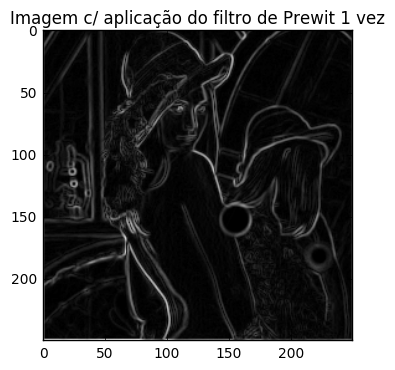

In [6]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro de Prewit %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro Prewit:

In [7]:
def filterPrewit (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Prewit filter
    ## Pre-set steps:
    ### Generate two kerners (horizontal and vertical)
    Filter.kernel = nf.structtype()
    Filter.kernel.horz = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.horz[:, 0] = -1
    Filter.kernel.horz[:, (Filter.kernelSize - 1)] = 1

    Filter.kernel.vert = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.vert[0, :] = -1
    Filter.kernel.vert[(Filter.kernelSize - 1), :] = 1

    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    somaHorz = 0;
    somaVert = 0;
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):

                    somaHorz = (C[j + kl, k + kk] * Filter.kernel.horz[kl, kk]) + somaHorz
                    somaVert = (C[j + kl, k + kk] * Filter.kernel.vert[kl, kk]) + somaVert

            Ph = m.ceil((somaHorz / (Filter.kernelSize ** 2)))
            Pv = m.ceil((somaVert / (Filter.kernelSize ** 2)))
            somaHorz = 0
            somaVert = 0
            D[j, k] = np.sqrt(Ph**2 + Pv**2)

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D

# Discussões sobre o método

Assim como o filto de Laplace, o de Prewit proporciona um efeito derivativo a imagem, porém com uma certa suavidade, gerando resultados mais consistentes para o destaque de transições suaves. A justificativa reside no fato de ser um filtro de efeito derivativo de primeira ordem(chamado de gradiente), combinando os valores referentes às variações nas duas direções da imagem.

A características de operação do filtro de Laplace provê ao mesmo a capacidade de realçar detalhes finos, ou ainda as menores transições possíveis, porém seus resultados expressam um aumento do ruído em imagens. Enquanto que o operador de Prewit leva em consideração elimitar transições suaves(por razão do efeito quase nulo da derivada em região constante) de e destacar transições abruptas.

Em suma, o filto Laplaciano deve ser usado quando há necessidades de em realçar objetos com detalhes pequenos, porém deve-se ter cuidado por ser bastante susceptíve ao ruído. De outro lado o filtro de Prewit é eficaz em destacar bordas e retirar transições suaves. As imagens a seguir exibem as funcionalidades descritas.

## Operações do filtro de prewit em uma imagem

- Definição da mascara:

Imagem original:


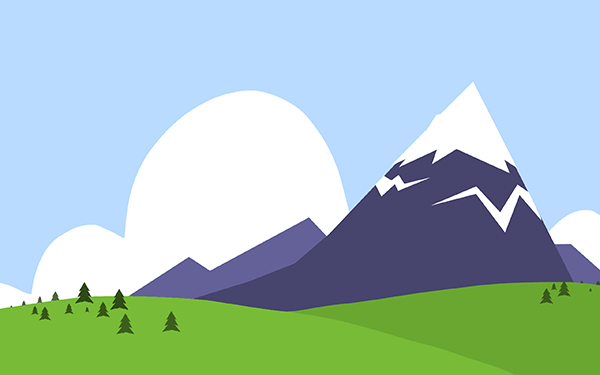

In [8]:
print("Imagem original:")
Image(filename='mountain-small.png')

################################
Process finished
Filter have been applied
################################
################################
Process finished
Filter have been applied
################################


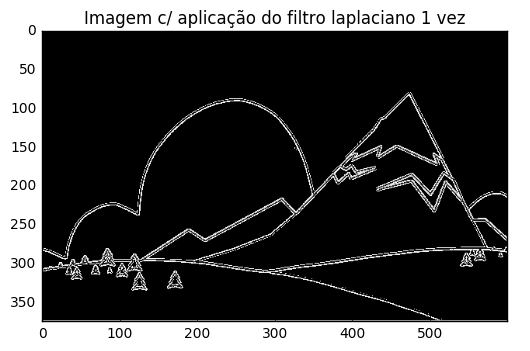

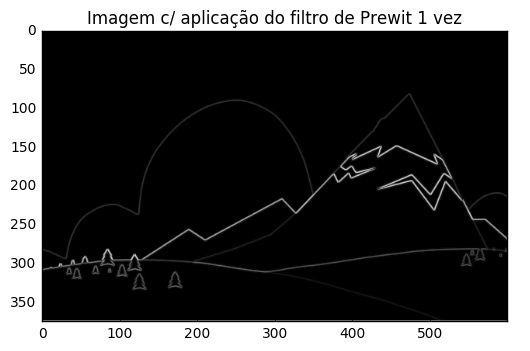

In [9]:
Filter.img = cv2.imread('mountain-small.png',cv2.IMREAD_GRAYSCALE)
U2 = nf.filterLaplace(Filter)

plt.figure(2)
plt.imshow(U2, 'gray')
plt.title('Imagem c/ aplicação do filtro laplaciano 1 vez')

U3 = nf.filterPrewit(Filter)

plt.figure(3)
plt.imshow(U3, 'gray')
plt.title('Imagem c/ aplicação do filtro de Prewit 1 vez')

plt.show()

O resultado está de acordo com as definições posteriores do filtro: regições de transição que apresentavam valores de intensidade bastante diferentes nos pixels próximos(derivada elevada) foram realçadas, ou contrário de regiões que tinham valores de intensidade próximos foram desprezadas(derivada nula).

## Quanto ao tamanho do kernel:

Submentendo uma imagem a uma variação do tamanho kernel constatou-se que máscaras de tamanhos menores, como 3x3, demonstram-se mais eficazes quando o objetivo é realce de bordas, pois a operação de gradiente do filtro de Sobel é valorizada em regiões próximas ao pixel, enquanto que em máscaras maiores, com 17x17, os valores de gradientes destoam devido a distância entre os pixels, propciando um valor de variação não confiável para a região.

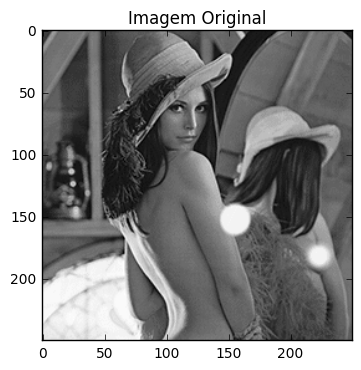

In [10]:
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

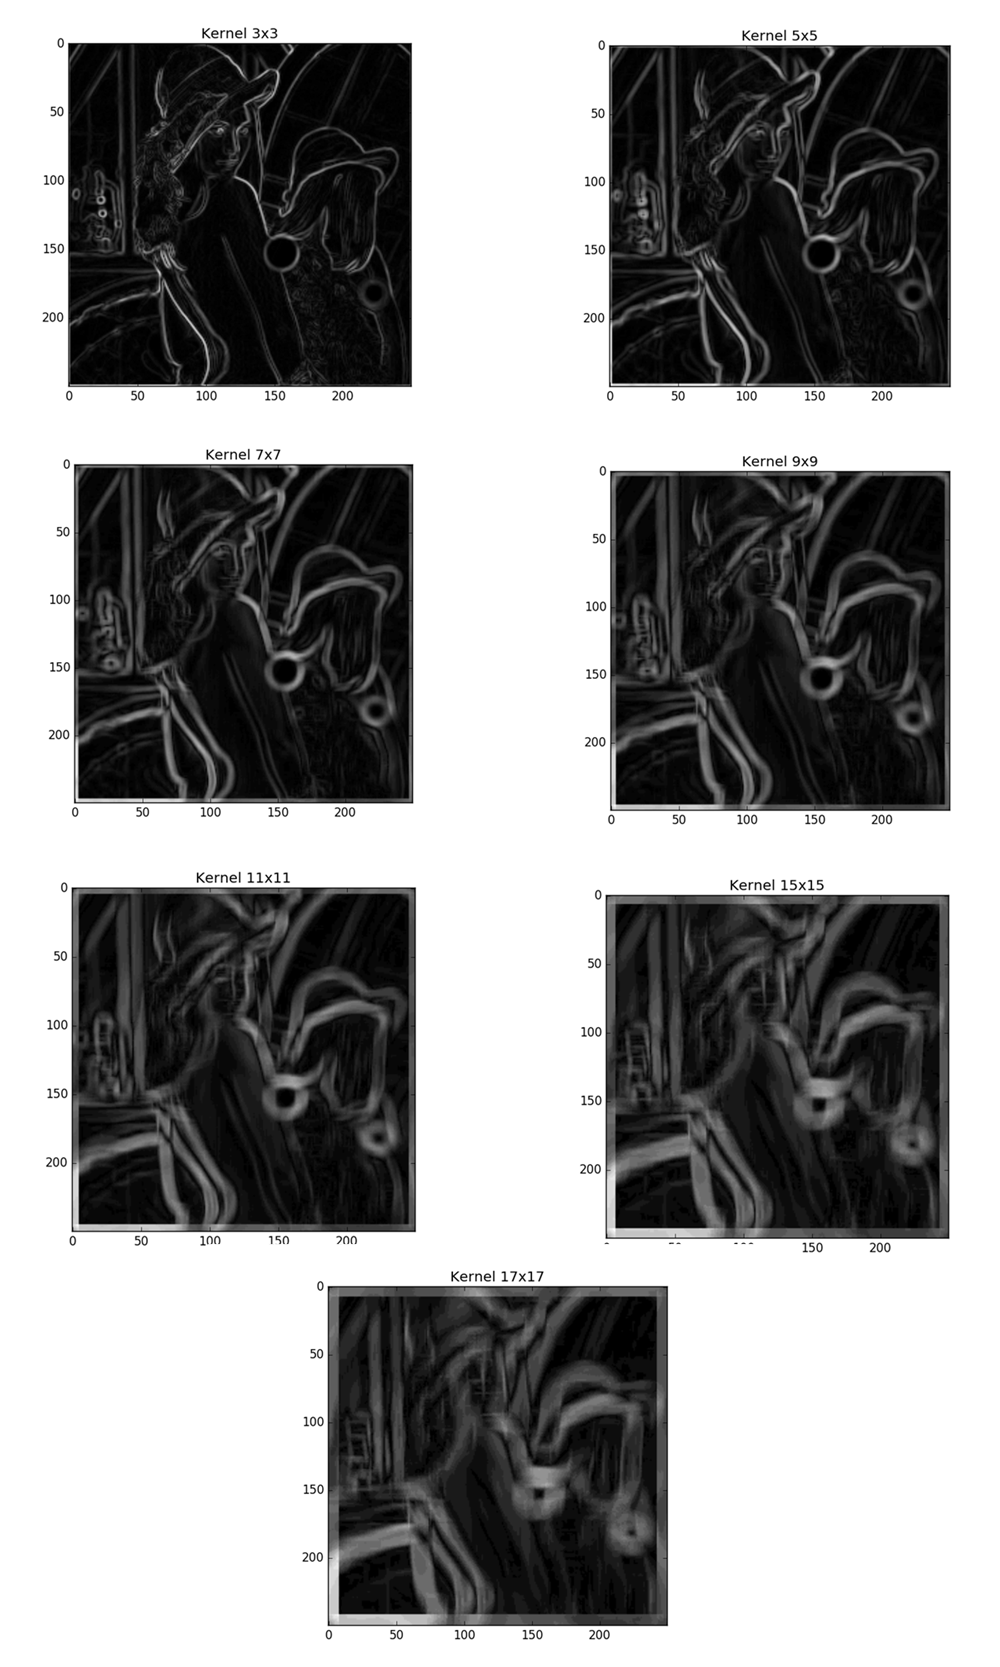

In [11]:
Image(filename='02.png')

## Quanto a aplicações sucessivas do filtro:

Aplicaçãoes excesssivas do filtro também corrompem a imagem original, assim no no Laplace. Por ser um operador de derivada, o cálculo iterativo e prolongado converge para valores fora do domínio da função de imagem, como ilustra-se nas figuras a seguir.

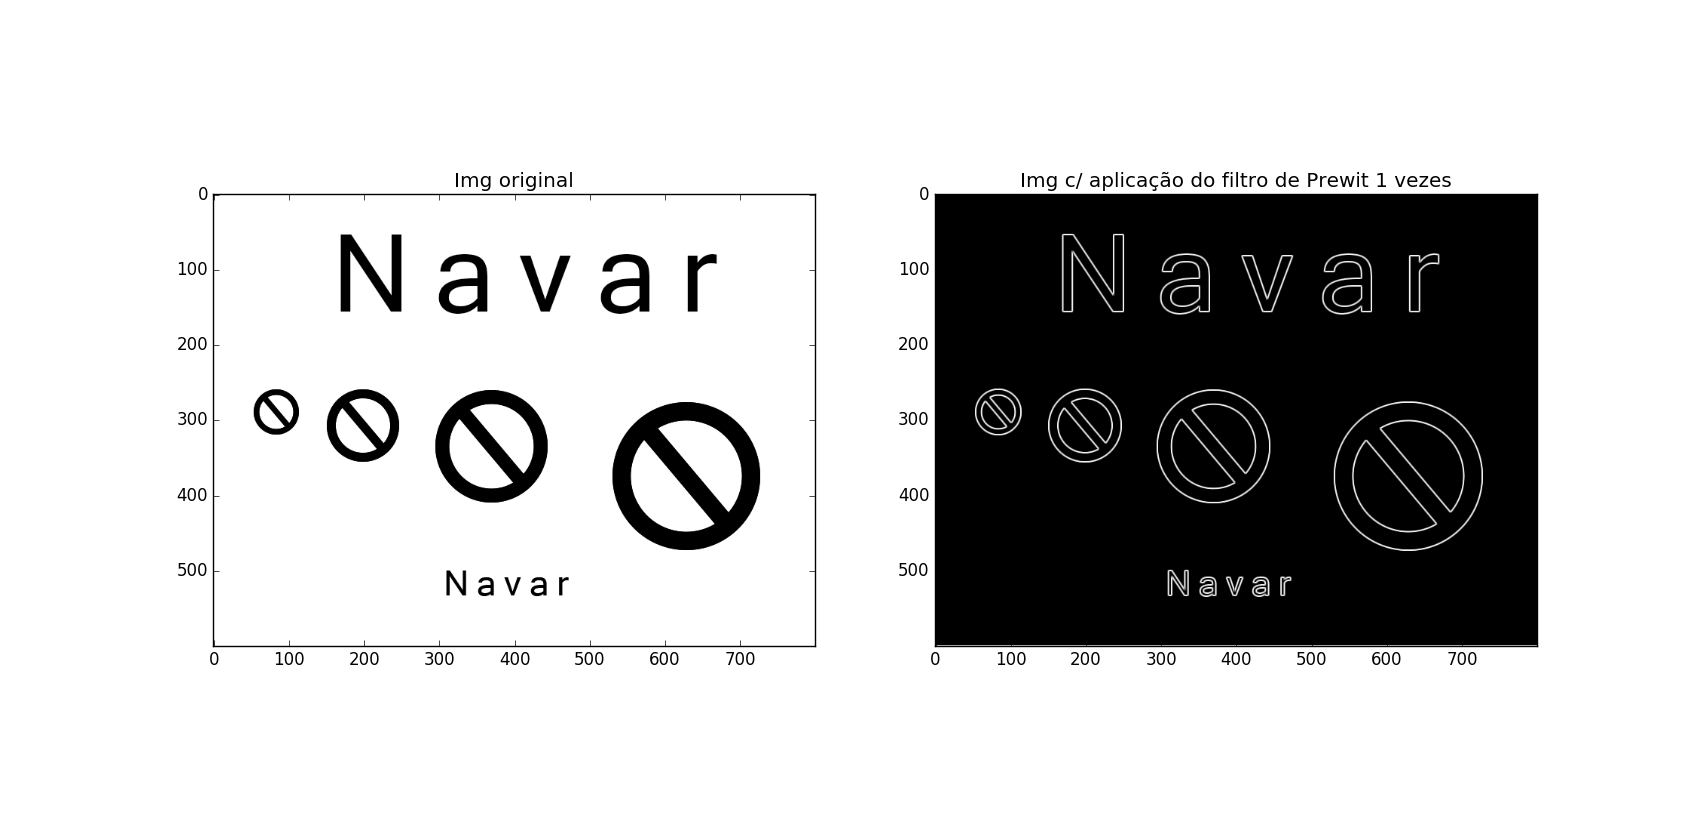

In [12]:
Image(filename='navar-filterPrewit01.png')

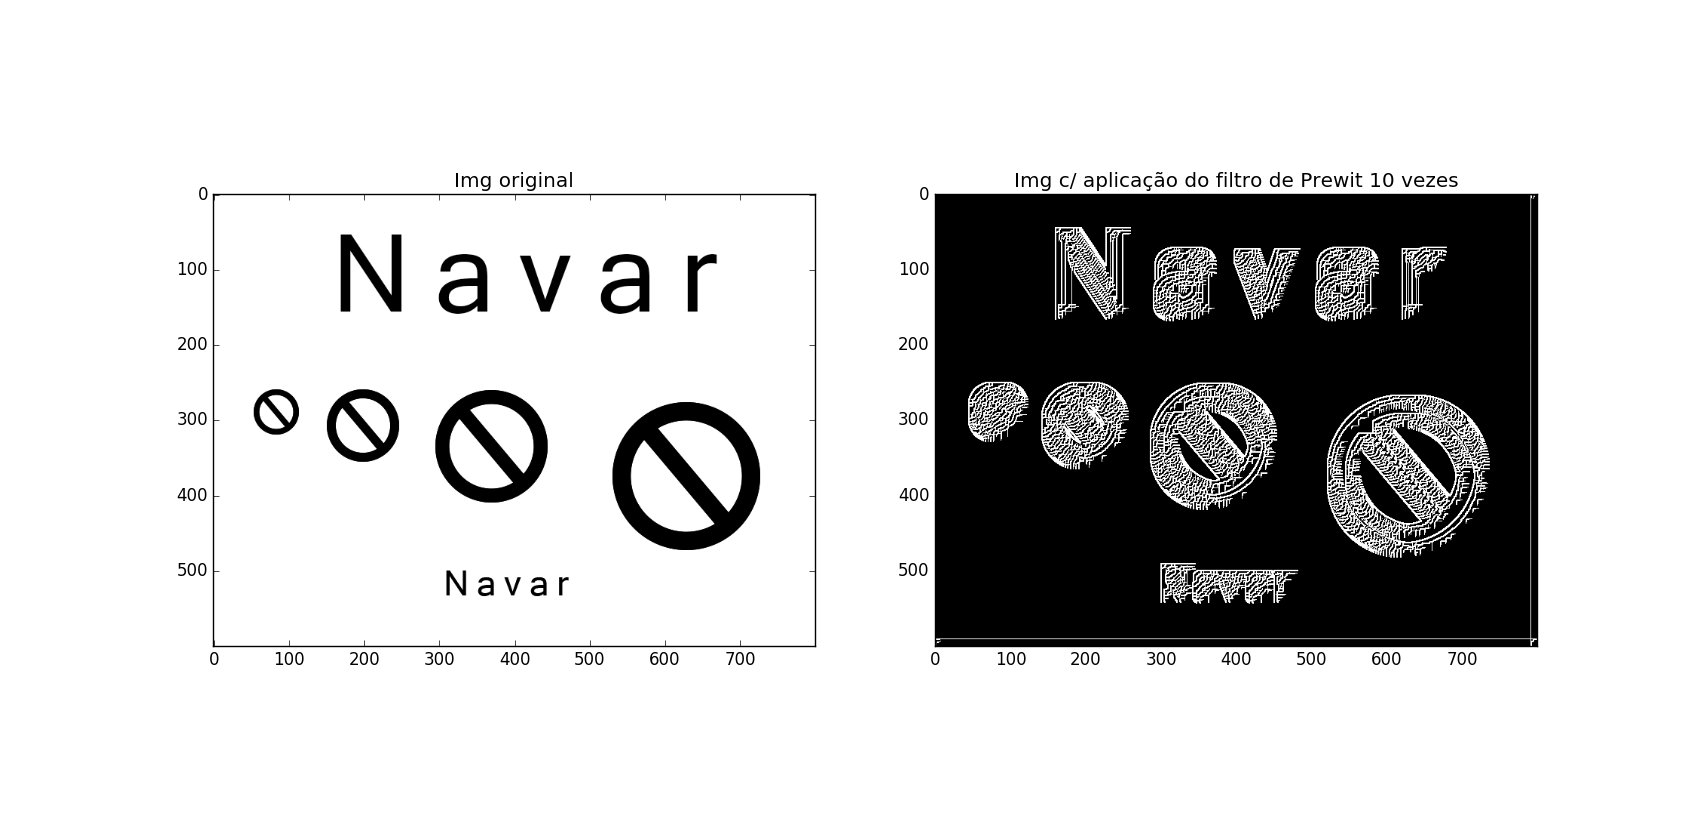

In [13]:
Image(filename='navar-filterPrewit02.png')

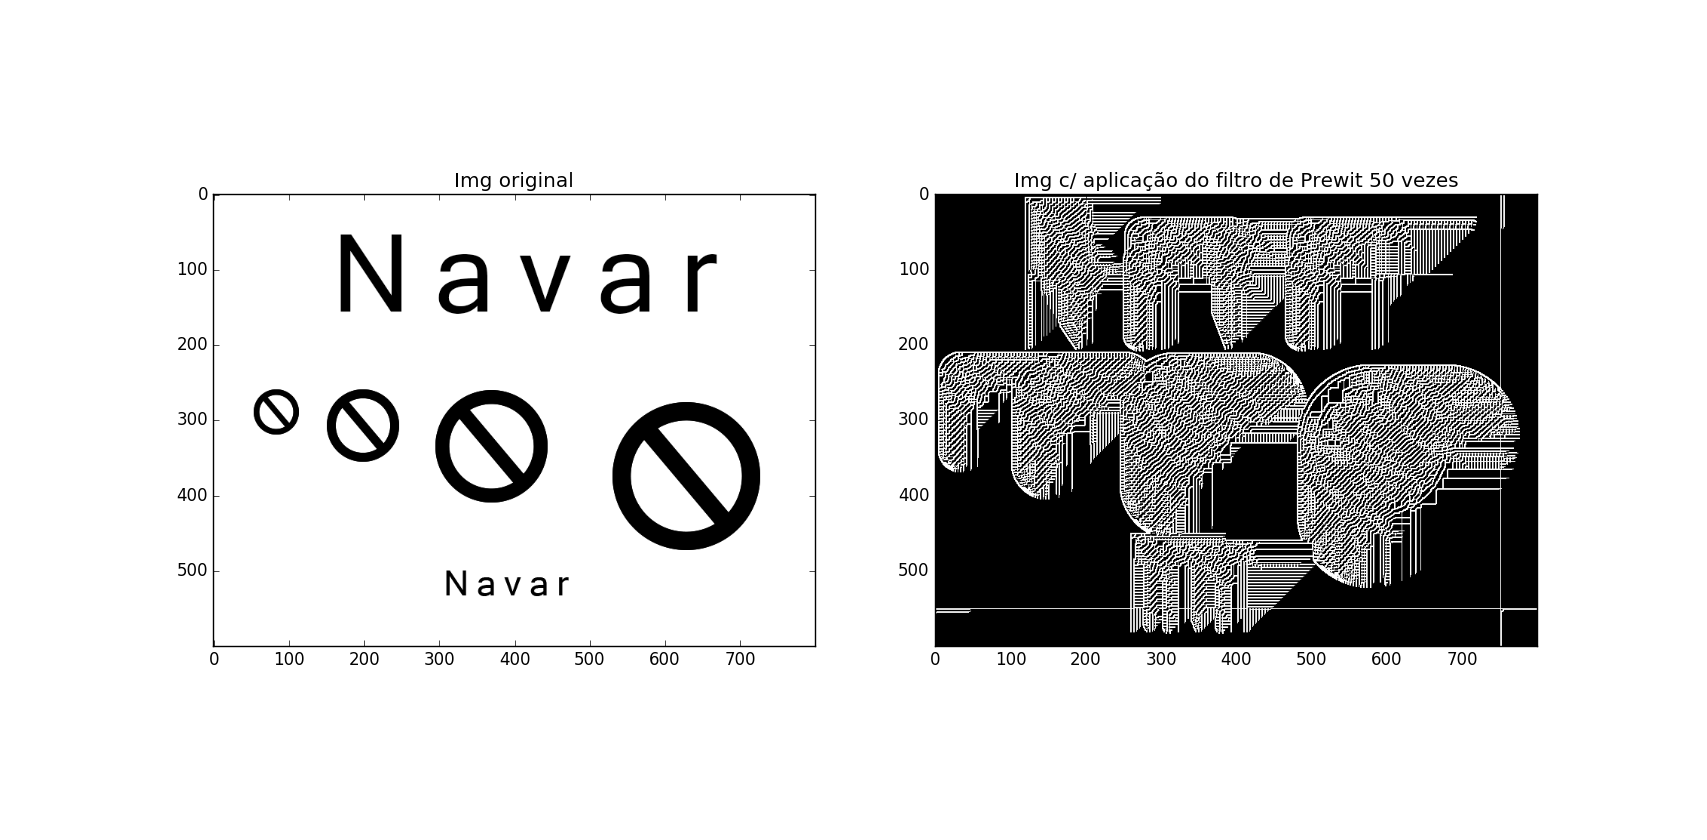

In [14]:
Image(filename='navar-filterPrewit03.png')

## Conclusões

O filtro de Prewit mostrou-se mais eficaz que o Laplaciano para a detecção de bordas, fator justificado pela operação matemática de derivação de primeira ordem, que ressalta apenas transições em primeira instância. Porém oferece um maior custo computacional em relação ao Laplace, visto que há necessidade de duas operações de convolução na imagem por meio das máscaras verticias e horizontais.